# Welcome to the Wind Turbine Power Production Algorithm Walkthrough

### Step 1: Read and Parse

The first step is to read in the text file "Power_Production_Dataset.txt" and then parse the text. We will parse this text at every "\n" which represents a newline. This will make it easier to read and manipulate the data. This will be achieved by using pythons import csv (Comma Separated Values).

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as skcl

path = "..\Dataset\Power_Production_Dataset.txt" # Text files path
file = open(path, newline='') # Open file for reading spliting lines at the end
reader = csv.reader(file) # read file into reader
header = next(reader) # The first line is a headeSr
xdata = [] # Create list called data

for row in reader:
    # row = [Speed, Power]
    speed = float(row[0])
    power = float(row[1])
    
    # Append to data
    xdata.append([speed, power])

In [2]:
import numpy as np
fileName = "..\Dataset\Power_Production_Dataset.txt" # Text files path

data = np.loadtxt(fileName, skiprows=1, delimiter=',')

In [3]:
data

array([[0.00000e+00, 0.00000e+00],
       [1.25000e-01, 0.00000e+00],
       [1.50000e-01, 0.00000e+00],
       [2.25000e-01, 0.00000e+00],
       [2.75000e-01, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [7.26000e-01, 0.00000e+00],
       [7.51000e-01, 0.00000e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.02600e+00, 0.00000e+00],
       [1.05100e+00, 2.08500e+00],
       [1.07600e+00, 0.00000e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00,

In [4]:
x = data[:,0]
y = data[:,1]

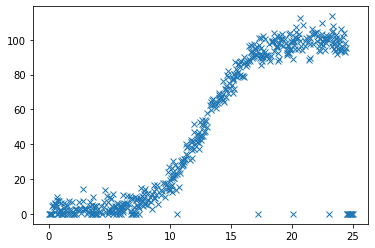

In [5]:
# Plot the data set.
plt.plot(x, y, 'x')
# Show plot
plt.show()

In [6]:
a, b, c, d = np.polyfit(x, y, 3)

In [7]:
a, b, c, d

(-0.052419266930753355,
 1.894857508594481,
 -12.94285866377901,
 19.201302460410755)

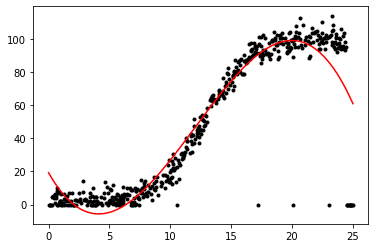

In [8]:
plt.plot(x, y, 'k.')
plt.plot(x, ((a*x*x*x) + (b*x*x) + (c*x) + d), 'r-')

In [9]:
import scipy.spatial as spatial
import pandas as pd
newData = pd.read_csv(fileName)

trainSet = newData
dis = []
i = 0
j = i+1

for a in trainSet.values:
    # Calculate the distance between points i, j
    c = spatial.distance.pdist(np.array([trainSet.values[i], trainSet.values[j]]), "euclidean")
    dis.append(c[0])
    
    # End before the last index
    if j == trainSet["speed"].values.size - 1:
        break
        
    # Increment index values
    i += 1
    j = i+1

# Calculate the mean distance between the sum of all points
mean_dis = np.mean(dis)
# Mean distance between 2 points
mean_dis    

5.6731936201644775

In [10]:
from sklearn.cluster import DBSCAN

# Use DBSCAN on with the mean_dis on the trainSet
clustering = DBSCAN(eps=mean_dis, min_samples=19).fit(trainSet)

# Find the data outliers using noise (-1)
outliers = np.where(clustering.labels_ == -1)
outliers = outliers[0]

# Retrieve outlier data
outlierData = trainSet.values[outliers]

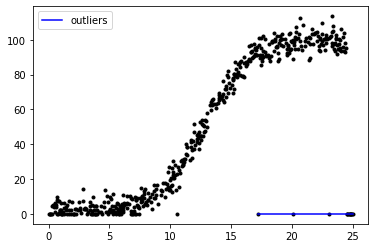

In [11]:
plt.plot(trainSet.values[:,0], trainSet.values[:,1], 'k.')
plt.plot(outlierData[:,0], outlierData[:,1], color='blue', label='outliers')
plt.legend()
plt.show()

In [12]:
# New data set that removes the outliers
finalDataSet = trainSet.drop(outliers)
x1 = finalDataSet.values[:,0]
y1 = finalDataSet.values[:,1]

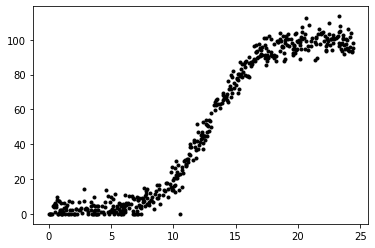

In [13]:
plt.plot(x1, y1, 'k.')
plt.show()

In [14]:
# Imports
import tensorflow.keras as kr
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Model
import pandas as pd

In [15]:
# Create a neural network with one neuron
model = kr.models.Sequential()
model.add(kr.layers.Dense(25, input_shape=(1,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros"))
model.add(kr.layers.Dense(100, input_shape=(1,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer="ones", bias_initializer="zeros"))

# Compile and fit (train & predict)
model.compile('adam', loss='mean_squared_error')
model.fit(x1, y1, epochs=250,  batch_size=10)

Epoch 1/250
49/49 [==============================] - 0s 791us/step - loss: 4263.1520
Epoch 2/250
49/49 [==============================] - 0s 735us/step - loss: 3951.8400
Epoch 3/250
49/49 [==============================] - 0s 722us/step - loss: 3528.1566
Epoch 4/250
49/49 [==============================] - 0s 785us/step - loss: 2836.9133
Epoch 5/250
49/49 [==============================] - 0s 711us/step - loss: 2523.6186
Epoch 6/250
49/49 [==============================] - 0s 717us/step - loss: 2493.8869
Epoch 7/250
49/49 [==============================] - 0s 733us/step - loss: 2325.9092
Epoch 8/250
49/49 [==============================] - 0s 742us/step - loss: 1946.3277
Epoch 9/250
49/49 [==============================] - 0s 727us/step - loss: 1988.9029
Epoch 10/250
49/49 [==============================] - 0s 726us/step - loss: 1972.1744
Epoch 11/250
49/49 [==============================] - 0s 667us/step - loss: 1901.2627
Epoch 12/250
49/49 [==============================] - 0s 719us/

49/49 [==============================] - 0s 683us/step - loss: 31.9514
Epoch 96/250
49/49 [==============================] - 0s 713us/step - loss: 31.7603
Epoch 97/250
49/49 [==============================] - 0s 622us/step - loss: 29.7431
Epoch 98/250
49/49 [==============================] - 0s 703us/step - loss: 26.5346
Epoch 99/250
49/49 [==============================] - 0s 755us/step - loss: 27.0732
Epoch 100/250
49/49 [==============================] - 0s 707us/step - loss: 25.7967
Epoch 101/250
49/49 [==============================] - 0s 661us/step - loss: 28.0985
Epoch 102/250
49/49 [==============================] - 0s 651us/step - loss: 24.5089
Epoch 103/250
49/49 [==============================] - 0s 717us/step - loss: 26.4969
Epoch 104/250
49/49 [==============================] - 0s 706us/step - loss: 27.2975
Epoch 105/250
49/49 [==============================] - 0s 691us/step - loss: 24.2334
Epoch 106/250
49/49 [==============================] - 0s 644us/step - loss: 26.758

49/49 [==============================] - 0s 670us/step - loss: 18.1339
Epoch 191/250
49/49 [==============================] - 0s 661us/step - loss: 19.8988
Epoch 192/250
49/49 [==============================] - 0s 796us/step - loss: 18.6782
Epoch 193/250
49/49 [==============================] - 0s 727us/step - loss: 18.9018
Epoch 194/250
49/49 [==============================] - 0s 686us/step - loss: 19.8959
Epoch 195/250
49/49 [==============================] - 0s 839us/step - loss: 19.1718
Epoch 196/250
49/49 [==============================] - 0s 748us/step - loss: 16.5175
Epoch 197/250
49/49 [==============================] - 0s 752us/step - loss: 17.1775
Epoch 198/250
49/49 [==============================] - 0s 723us/step - loss: 19.3747
Epoch 199/250
49/49 [==============================] - 0s 720us/step - loss: 24.0417
Epoch 200/250
49/49 [==============================] - 0s 717us/step - loss: 18.9753
Epoch 201/250
49/49 [==============================] - 0s 758us/step - loss: 17

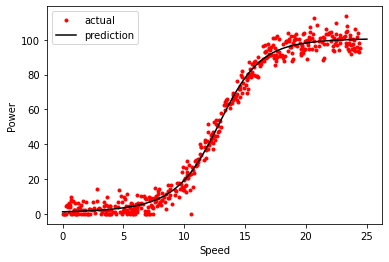

In [16]:
# Plot prodiction model with finaDataSet
plt.plot(x1, y1, 'r.', label="actual")
plt.plot(newData['speed'], model.predict(newData['speed']), color="black", label="prediction")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.show()

In [17]:
model.evaluate(x1, y1)

16/16 [==============================] - 0s 665us/step - loss: 18.1961


18.19607925415039

In [18]:
model.save("model.h5")

In [19]:
# Test Run Prediction
user = int(input("Your wind speed please: "))
finalDataSet['speed'] = user
finalDataSet['power'] = model.predict(finalDataSet['speed'])
prediction = finalDataSet['power'][0]
print("Predicted Power Generated: ", prediction)

Your wind speed please: 10
Predicted Power Generated:  19.420494


## References

[1] - [Cubic Equation](https://www.storyofmathematics.com/solving-cubic-equations#:~:text=A%20cubic%20equation%20is%20an,and%20d%20is%20the%20constant.)

[2] - [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)